In [12]:
import pandas as pd
import numpy as np
import geopandas

%matplotlib inline

In [13]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/county_health_rankings/chr_2016.csv'
chr_df = pd.read_csv(url,dtype={'FIPS':str})
chr_df.head()

,FIPS,State,County,Premature death - # Deaths,Premature death - Years of Potential Life Lost Rate,Poor or fair health - % Fair/Poor,Poor physical health days - Physically Unhealthy Days,Poor mental health days - Mentally Unhealthy Days,Low birthweight - Unreliable,Low birthweight - # Low Birthweight Births,...,Demographics - % Native Hawaiian/Other Pacific Islander,Demographics - # Hispanic,Demographics - % Hispanic,Demographics - # Non-Hispanic White,Demographics - % Non-Hispanic White,Demographics - # Not Proficient in English,Demographics - % Not Proficient in English,Demographics - % Female,Demographics - # Rural,Demographics - % Rural
0,01001,Alabama,Autauga,809.0,9215.1,19.4,4.4,4.3,NaN,407.0,...,0.101092,1514.0,2.733099,41877.0,75.597076,249.0,0.481429,51.362036,22921.0,42.002162
1,01003,Alabama,Baldwin,2506.0,7454.6,16.0,4.1,4.2,NaN,1300.0,...,0.063964,9130.0,4.562468,166093.0,83.000435,2571.0,1.429898,51.228568,77060.0,42.279099
2,01005,Alabama,Barbour,410.0,8499.9,25.7,4.9,4.7,NaN,272.0,...,0.174806,1219.0,4.533790,12525.0,46.583851,549.0,2.150664,46.613605,18613.0,67.789635
3,01007,Alabama,Bibb,414.0,11007.7,22.0,4.8,4.6,NaN,221.0,...,0.128855,474.0,2.106105,16772.0,74.522350,112.0,0.521100,45.934417,15663.0,68.352607
4,01009,Alabama,Blount,876.0,8655.9,20.7,4.6,4.5,NaN,364.0,...,0.114347,5042.0,8.735425,50652.0,87.756198,954.0,1.765032,50.531021,51562.0,89.951502


In [14]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/election/county_election_data_2000-2016.csv'
election_df = pd.read_csv(url,dtype={'FIPS':str})
election_df = election_df.loc[:,['FIPS','gop_minus_dem_prc_2016']]

# Fix Shannon - > Oglala Lakota County Issue
election_df.loc[election_df['FIPS']=='46113','FIPS'] = '46102'

#election_df.head()
election_df[election_df.FIPS=='31103']

,FIPS,gop_minus_dem_prc_2016
1715,31103,NaN


In [4]:
url = 'https://raw.githubusercontent.com/thomaspingel/geodata/master/cartographic_boundary_files/cb_2016_us_county_20m.geojson'
counties_df = geopandas.read_file(url)
counties_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,39,131,01074078,0500000US39131,39131,Pike,06,1140324458,9567612,"(POLYGON ((-83.353531 39.197585, -82.785891000..."
1,46,003,01266983,0500000US46003,46003,Aurora,06,1834813753,11201379,"(POLYGON ((-98.807771 43.935223, -98.331508 43..."
2,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"(POLYGON ((-91.65045499999999 44.855951, -90.9..."
3,72,145,01804553,0500000US72145,72145,Vega Baja,13,118766803,57805868,"(POLYGON ((-66.448989 18.387214, -66.438950007..."
4,48,259,01383915,0500000US48259,48259,Kendall,06,1715747531,1496797,"(POLYGON ((-98.920147 30.13829, -98.587897 30...."


#### Merge the data

In [5]:
output_df = counties_df.merge(election_df,left_on='GEOID',right_on='FIPS',how='left')
output_df = output_df.merge(chr_df,left_on='GEOID',right_on='FIPS',how='left')

In [6]:
keep = (output_df['STATEFP']!='02') & (output_df['STATEFP']!='15') & (output_df['STATEFP']!='72')
output_df = output_df[keep]

c:\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


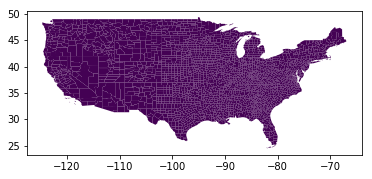

In [7]:
output_df.plot(column='gop_minus_dem_prc_2016')

In [8]:
output_df

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,Demographics - % Native Hawaiian/Other Pacific Islander,Demographics - # Hispanic,Demographics - % Hispanic,Demographics - # Non-Hispanic White,Demographics - % Non-Hispanic White,Demographics - # Not Proficient in English,Demographics - % Not Proficient in English,Demographics - % Female,Demographics - # Rural,Demographics - % Rural
0,39,131,01074078,0500000US39131,39131,Pike,06,1140324458,9567612,"(POLYGON ((-83.353531 39.197585, -82.785891000...",...,0.109711,255.0,0.902463,26979.0,95.480606,67.0,0.250131,50.240657,21313.0,74.238044
1,46,003,01266983,0500000US46003,46003,Aurora,06,1834813753,11201379,"(POLYGON ((-98.807771 43.935223, -98.331508 43...",...,0.000000,121.0,4.408015,2521.0,91.839709,67.0,2.656622,48.451730,2710.0,100.000000
2,55,035,01581077,0500000US55035,55035,Eau Claire,06,1652211310,18848512,"(POLYGON ((-91.65045499999999 44.855951, -90.9...",...,0.058091,2299.0,2.263597,92399.0,90.976133,827.0,0.872722,50.674452,22710.0,23.000729
4,48,259,01383915,0500000US48259,48259,Kendall,06,1715747531,1496797,"(POLYGON ((-98.920147 30.13829, -98.587897 30....",...,0.100309,8698.0,22.371399,28935.0,74.421296,1197.0,3.500102,51.162551,19431.0,58.159234
5,40,015,01101795,0500000US40015,40015,Caddo,06,3310745124,30820525,"(POLYGON ((-98.623149 35.551597, -98.313250999...",...,0.088686,3317.0,11.314255,17086.0,58.280179,264.0,0.959337,48.180237,23671.0,79.969595
6,19,093,00465235,0500000US19093,19093,Ida,06,1117599859,1406461,"(POLYGON ((-95.74161100000001 42.561285, -95.3...",...,0.014201,142.0,2.016473,6749.0,95.839250,2.0,0.030262,50.056802,7089.0,100.000000
7,28,071,00695759,0500000US28071,28071,Lafayette,06,1636141755,123052156,"(POLYGON ((-89.721341 34.554274, -89.668448 34...",...,0.096354,1226.0,2.316267,37154.0,70.194597,220.0,0.462107,51.216701,21583.0,45.580875
8,12,027,00294452,0500000US12027,12027,DeSoto,06,1649978040,6247257,"(POLYGON ((-82.05649699999999 27.207769, -82.0...",...,0.191363,10689.0,30.529533,19317.0,55.172512,4295.0,13.126127,43.719296,16121.0,46.242327
9,31,137,00835890,0500000US31137,31137,Phelps,06,1398048574,1646534,"(POLYGON ((-99.643462 40.684911, -99.444401 40...",...,0.043540,491.0,5.344509,8520.0,92.739741,87.0,1.012452,50.255796,3848.0,41.880714
10,26,143,01623014,0500000US26143,26143,Roscommon,06,1345852870,156421369,"(POLYGON ((-84.85092899999999 44.511069, -84.3...",...,0.020872,363.0,1.515341,22877.0,95.499896,48.0,0.206505,50.085577,16149.0,66.051781


In [9]:
output_df[output_df.gop_minus_dem_prc_2016.isnull()]

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,Demographics - % Native Hawaiian/Other Pacific Islander,Demographics - # Hispanic,Demographics - % Hispanic,Demographics - # Non-Hispanic White,Demographics - % Non-Hispanic White,Demographics - # Not Proficient in English,Demographics - % Not Proficient in English,Demographics - % Female,Demographics - # Rural,Demographics - % Rural
620,31,103,00835873,0500000US31103,31103,Keya Paha,06,2002257567,2192458,"(POLYGON ((-100.198413799775 42.9979768839694,...",...,0.0,5.0,0.617284,794.0,98.024691,1.0,0.138313,51.111111,824.0,100.0


In [11]:
election_df[election_df.FIPS=='31103']

,FIPS,gop_minus_dem_prc_2016
1715,31103,NaN
